# Описание проекта:
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях;
* выгрузка их покупок за этот период;
* рекламные расходы.

Вам предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупаются;
* какие факторы мешают привлечению клиентов.

## Описание данных:
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя;
* User Id — уникальный идентификатор пользователя;
* Device — тип устройства пользователя;
* Device — тип устройства пользователя;
* Session Start — дата и время начала сессии;
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя;
* Event Dt — дата и время покупки;
* Revenue — сумма заказа.

Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании;
* Channel — идентификатор рекламного источника;
* costs — расходы на эту кампанию.

### Загрузим данные и подготовьте их к анализу:

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

**Импортируем нужные библиотеки:**

In [1]:
import pandas as pd # импорт необходимой библиотеки pandas для работы с данными
import numpy as np # импорт необходимой библиотеки numpy для работы с числами
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import time
from datetime import datetime
from datetime import date, timedelta as td

**Считывание данных и запись их в переменные:**

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv') # считаем необходимый файл visits_info_short.csv сохраняем его в переменной visits
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv') # считаем необходимый файл orders_info_short.csv сохраняем его в переменной orders
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv') # считаем необходимый файл costs_info_short.csv сохраняем его в переменной costs
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

**Выведем первые 5 строк датасетов:**

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Ознакомимся с данными, методом info():**

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Приведение столбцов к нижнему регистру и замена пробелов на нижний знак подчеркивания:**

In [9]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [10]:
visits.columns # посмотрим на результат датасета visits

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [11]:
orders.columns # посмотрим на результат датасета orders

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [12]:
costs.columns # посмотрим на результат датасета costs

Index(['dt', 'channel', 'costs'], dtype='object')

**В датасетах столбцы имеют тип данных object, которые необходимо перевести в тип datetime:**

В датасете visits есть столбцы session_start и session_end и необходимо перевести в тип datetime:

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

В датасете orders есть столбец event_dt и необходимо перевести в тип datetime:

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format = "%Y-%m-%d %H:%M:%S")
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

В датасете costs есть столбец dt и необходимо перевести в тип datetime:

In [15]:
costs['dt'] = pd.to_datetime(costs['dt'], format = "%Y-%m-%d")

**Перевод данных датасета visits в нужные типы данных:**

В датасете visits есть столбцы region, device, channel они являются типом данных oblect, переведем их в тип данных str:

In [16]:
visits['region'] = visits['region'].astype(str)
visits['device'] = visits['device'].astype(str)
visits['channel'] = visits['channel'].astype(str)

**Перевод данных датасета costs в нужные типы данных:**

В датасете costs есть столбцец channel он является типом данных oblect, переведем его в тип данных str:

In [17]:
costs['channel'] = costs['channel'].astype('str')

**Посмотрим на количество пропущенных значений:**

In [18]:
visits.isna().sum() # выведем количество пропущенных значений для каждого столбца датасета visits

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [19]:
orders.isna().sum() # выведем количество пропущенных значений для каждого столбца датасета orders

user_id     0
event_dt    0
revenue     0
dtype: int64

In [20]:
costs.isna().sum() # выведем количество пропущенных значений для каждого столбца датасета costs

dt         0
channel    0
costs      0
dtype: int64

Пропущенные значения в данных отсутствуют.

**Проверим на явные дубликаты:**

In [21]:
print('Количетво явных дубликатов в файле visits:', visits.duplicated().sum())

Количетво явных дубликатов в файле visits: 0


In [22]:
print('Количетво явных дубликатов в файле orders:', orders.duplicated().sum())

Количетво явных дубликатов в файле orders: 0


In [23]:
print('Количетво явных дубликатов в файле costs:', costs.duplicated().sum())

Количетво явных дубликатов в файле costs: 0


**Изучим данные датасета visits:**

Построим гистограммы по данным столбцов:

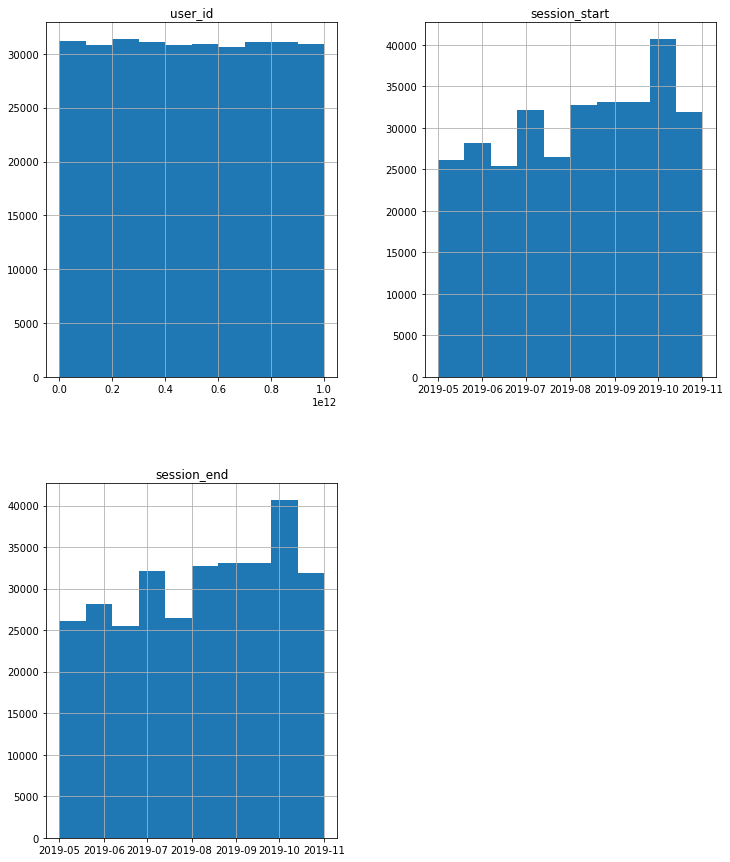

In [24]:
visits.hist(figsize = (12, 15));

Посмотрим на уникальные значения столбцов датасета и их количество:

In [25]:
display(visits['region'].unique()) # посмотрим уникальные значения столбца region
display(visits['region'].value_counts())
display(visits['region'].count())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

309901

In [26]:
display(visits['device'].unique()) # посмотрим уникальные значения столбца device
display(visits['device'].value_counts())
display(visits['device'].count())

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

309901

In [27]:
display(visits['channel'].unique()) # посмотрим уникальные значения столбца channel
display(visits['channel'].value_counts())
display(visits['channel'].count())

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

309901

**Изучим данные датасета orders:**

Построим гистограммы по данным столбцов:

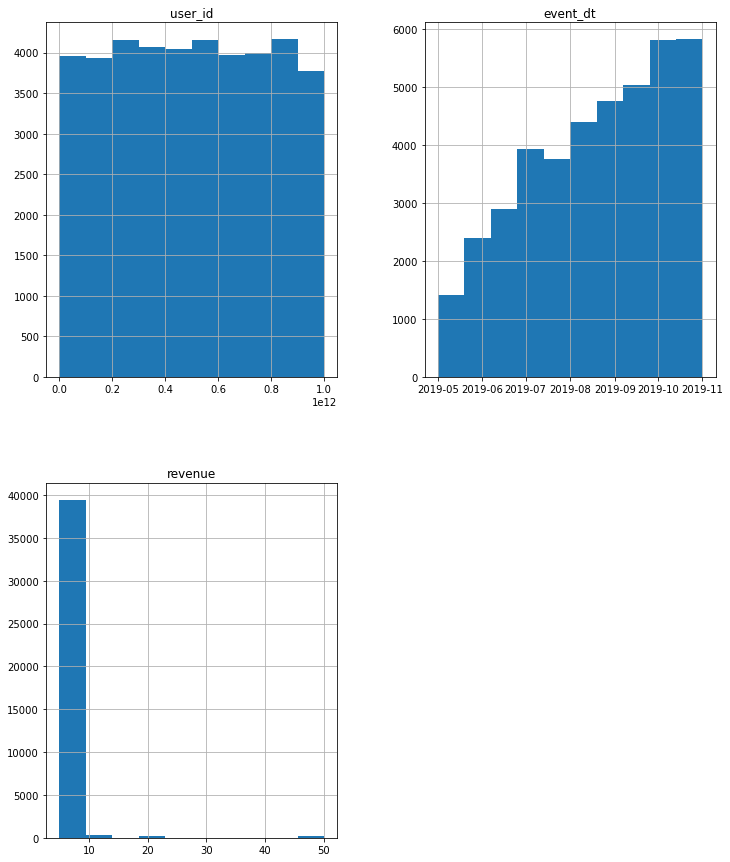

In [28]:
orders.hist(figsize = (12, 15));

Посмотрим на уникальные значения столбцов датасета и их количество:

In [29]:
display(orders['event_dt'].unique()) # посмотрим уникальные значения столбца event_dt
display(orders['event_dt'].value_counts())
display(orders['event_dt'].count())

array(['2019-05-01T23:09:52.000000000', '2019-05-01T12:24:04.000000000',
       '2019-05-01T11:34:04.000000000', ...,
       '2019-10-31T06:17:29.000000000', '2019-10-31T22:46:19.000000000',
       '2019-10-31T13:29:06.000000000'], dtype='datetime64[ns]')

2019-10-26 06:49:22    2
2019-06-27 06:09:53    2
2019-09-14 23:35:11    2
2019-10-05 08:23:22    2
2019-10-11 20:55:22    2
                      ..
2019-08-20 02:51:09    1
2019-08-20 06:58:44    1
2019-08-20 14:41:23    1
2019-08-20 18:09:32    1
2019-10-31 13:29:06    1
Name: event_dt, Length: 40163, dtype: int64

40212

Посмотрим на основные статистические характеристики столбца revenue:

In [30]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

**Изучим данные датасета costs:**

Построим гистограммы по данным столбца:

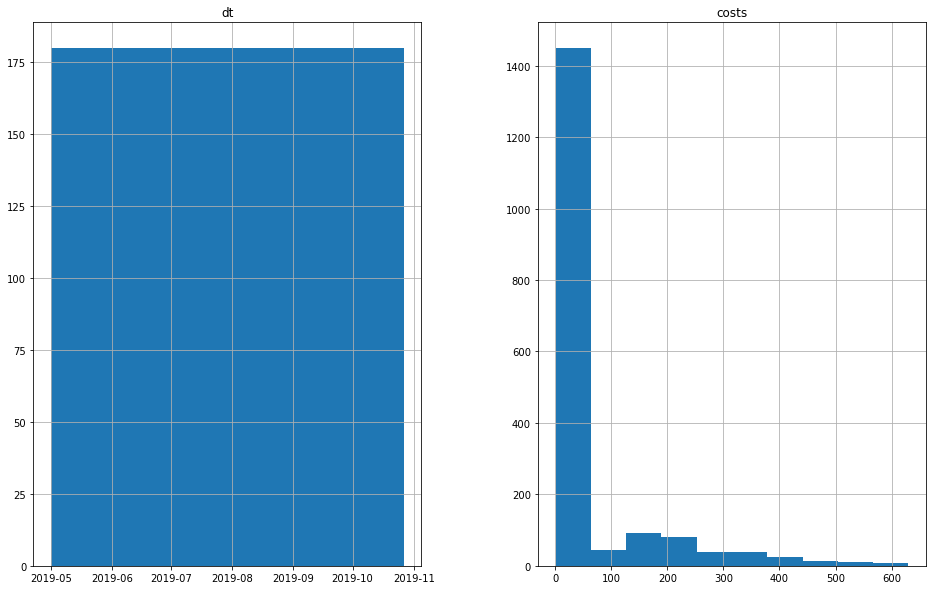

In [31]:
costs.hist(figsize = (16, 10));

Посмотрим на уникальные значения столбцов датасета и их количество:

In [32]:
display(costs['channel'].unique()) # посмотрим уникальные значения столбца channel
display(costs['channel'].value_counts())
display(costs['channel'].count())

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

1800

Посмотрим на основные статистические характеристики столбца costs:

In [33]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим момент и горизонт анализа:

In [34]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

**Функция для создания пользовательских профилей:**

In [35]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by = ['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns = {'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

**Функция для расчёта удержания:**

In [36]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions = [],
    ignore_horizon = False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days = horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on = 'user_id', how = 'left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns = {'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        result = result.div(result['cohort_size'], axis = 0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчёта конверсии:**

In [37]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions = [],
    ignore_horizon = False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days = horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns = {'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчёта LTV и ROI:**

In [38]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions = [],
    ignore_horizon = False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days = horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index = dims, columns = 'lifetime', values = 'revenue', aggfunc = 'sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns = {'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis = 0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns = {'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis = 0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функция для сглаживания фрейма:**

In [39]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**Функция для визуализации удержания:**

In [40]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize = (15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns = ['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid = True, ax = ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid = True, ax = ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index = 'dt', columns=columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Функция для визуализации конверсии:**

In [41]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns = ['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns = ['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для визуализации LTV и ROI:**

In [42]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize = (20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns = ['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns = ['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns = ['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns = ['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey = ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey = ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index = 'dt', columns = columns, values = 'cac', aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid = True, ax = ax4)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey = ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax5)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Составление профилей пользователей, определение минимальной и максимальной даты привлечения пользователей:**

Составление профили пользователей:

In [43]:
profiles = get_profiles(visits, orders, costs) # вызовем функцию get_profiles и передадим ей параметры visits, orders и costs
display(profiles.head()) # выведем первые 5 строк на экран

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определение минимальной и максимальной даты привлечения пользователей:

In [44]:
min_date = profiles['dt'].min()
print(f'Минимальная дата привлечения пользователей: {min_date}')
observation_date = profiles['dt'].max()
print(f'Максимальная дата привлечения пользователей: {observation_date}')

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


**Определение, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей:**

Построим таблицу, которая будет отражать количество пользователей из каждой страны и их долю относительно всего количества:

In [45]:
country_share = pd.DataFrame()
country_share['users_groupby'] = profiles.groupby('region')['user_id'].count()
country_share['fraction'] = ((country_share['users_groupby'] / profiles['region'].count()) * 100).round(1)
country_share.columns = ['Количество пользователей:', 'Доля в %']
country_share.sort_values(by = 'Доля в %', ascending = False)

,Количество пользователей:,Доля в %
region,,
United States,100002,66.7
UK,17575,11.7
France,17450,11.6
Germany,14981,10.0


Из таблицы можно заметить, что больше всего пользователей из United States, их 67 %. Дальше идут пользователи UK и France, по 12 %. И в конце идут пользователи из Germany (10%).

Построим круговую диограмму, которая будет отражать количество пользователей и их от общего количества:

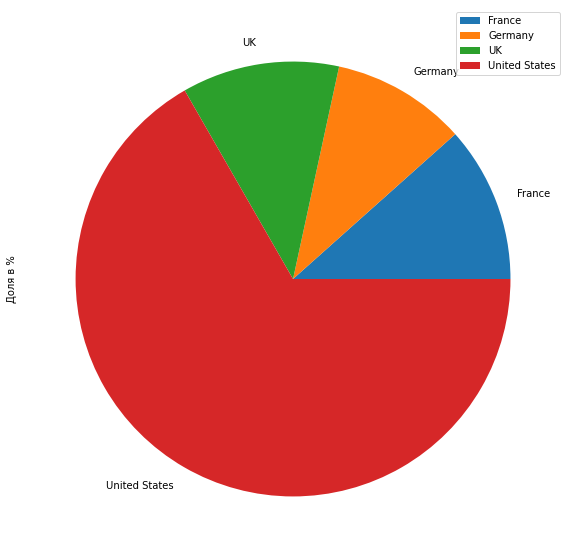

In [46]:
country_share.plot(kind = 'pie', figsize = (10, 10), y = 'Доля в %');

Построим таблицу, которая будет отражать количество платящих пользователей и их долю от общего количества:

In [47]:
country_payer_share = pd.DataFrame()
country_payer_share['users_groupby'] = profiles.query('payer == True').groupby('region')['user_id'].count()
country_payer_share['fraction'] = ((country_payer_share['users_groupby'] / profiles.query('payer == True')['region'].count()) * 100).round(1)
country_payer_share.columns = ['Количество платящих пользователей:', 'Доля в %:']
country_payer_share.sort_values(by = 'Доля в %:', ascending = False)

,Количество платящих пользователей:,Доля в %:
region,,
United States,6902,77.7
UK,700,7.9
France,663,7.5
Germany,616,6.9


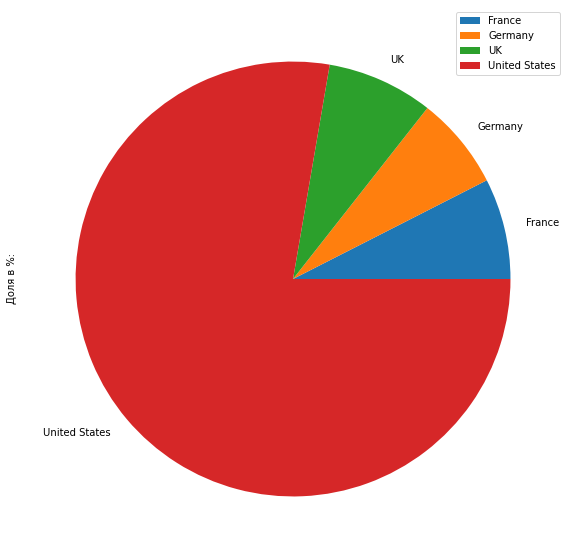

In [48]:
country_payer_share.plot(kind = 'pie', figsize = (10, 10), y = 'Доля в %:');

Больше всего платящих пользователей из United States их 78%. Далее идут пользователи из UK и France их по 8 и 7% соответственно от общего количества. А меньше всего платящих пользователей из Germany, их 7%.

Рассчитаем долю платящих пользователей отдельно по странам (создадим функцию для дальнейшего удобства создания таблиц):

In [49]:
def table_share_result(column, df):
    table = pd.DataFrame()
    table['Количество пользователей:'] = df.groupby(column)['user_id'].count()
    table['Доля пользователей в %:'] = ((table['Количество пользователей:'] / df[column].count()) * 100).round(1)
    table['Количество платящих пользователей:'] = df.query('payer == True').groupby(column)['user_id'].count()
    table['Доля платящих пользователей в %:'] = ((table['Количество платящих пользователей:'] / table['Количество пользователей:']) * 100).round(1)
    return table.sort_values(by = 'Доля пользователей в %:', ascending = False)
table_share_result('region', profiles)

,Количество пользователей:,Доля пользователей в %:,Количество платящих пользователей:,Доля платящих пользователей в %:
region,,,,
United States,100002,66.7,6902,6.9
UK,17575,11.7,700,4.0
France,17450,11.6,663,3.8
Germany,14981,10.0,616,4.1


**Вывод:** больше всего пользователей из United States(67%), а доля платящих из них это 6,9%. Дальше следует UK(12%), доля платящих из них это 4%. Потом идет France(12%), там доля платящих клиентов равна 3.8%. И самое маленькое количество пользователей в Germany, но доля платящих из них равна 4.1%.

**Узнаем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:**

Построим таблицу, которая будет отражать, какими устройствами пользуются клиенты и их доля от общего количества:

In [50]:
device_share = pd.DataFrame()
device_share['users_groupby'] = profiles.groupby('device')['user_id'].count()
device_share['fraction'] = ((device_share['users_groupby'] / profiles['device'].count()) * 100).round(1)
device_share.columns = ['Количество устройств:', 'Доля в %:']
device_share.sort_values(by = 'Доля в %:', ascending = False)

,Количество устройств:,Доля в %:
device,,
iPhone,54479,36.3
Android,35032,23.4
PC,30455,20.3
Mac,30042,20.0


Видно, что большинство пользователей - это владельцы IPhone, их 36 %. Дальше идут пользователи Android, их уже 23 %. А вот пользователей PC и MAC по 20 %. Получается, что клиенты чаще пользуются мобильными устройствами, нежели PC или Mac.

Построим таблицу, которая будет отражать, какими устройствами пользуются платящие клиенты и их доля от общего количества:

In [51]:
device_payer_share = pd.DataFrame()
device_payer_share['users_groupby'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_share['fraction'] = ((device_payer_share['users_groupby'] / profiles.query('payer == True')['device'].count()) * 100).round(1)
device_payer_share.columns = ['Количество устройств платящих клиентов:', 'Доля в %:']
device_payer_share.sort_values(by = 'Доля в %:', ascending = False)

,Количество устройств платящих клиентов:,Доля в %:
device,,
iPhone,3382,38.1
Android,2050,23.1
Mac,1912,21.5
PC,1537,17.3


Больше всего платящих клиентов, которые пользуются IPhone их 38%. Потом идет Android(23%). А дальше уже Mac и PC по 22% и 17% соответственно.

In [52]:
table_share_result('device', profiles)

,Количество пользователей:,Доля пользователей в %:,Количество платящих пользователей:,Доля платящих пользователей в %:
device,,,,
iPhone,54479,36.3,3382,6.2
Android,35032,23.4,2050,5.9
PC,30455,20.3,1537,5.0
Mac,30042,20.0,1912,6.4


**Вывод:** самая большая доля платящих пользователей для устройства Mac их 6.4% от общего количества или 1912 человек. Среди пользователей iPhone, которых 54479 человек доля платящих клиентов составляет 6.2%. Для пользователей Android, их 35032 человек, доля платящих из них клиентов равна 5.9%. У пользователей PC, которых 30455 платящих клиентов меньше всего - 5.05% или 1537 человек.

**Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения:**

Построим таблицу для количества пользователей и количества платящих пользователей, и сгруппируем их по каналам привлечения, а также вычислим их доли от общего количества:

In [53]:
channel_share = pd.DataFrame()
channel_share['users_channel'] = profiles.groupby('channel')['user_id'].count()
channel_share['fraction'] = ((channel_share['users_channel'] / profiles['channel'].count()) * 100).round(1)

channel_share['payer_users_channel'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_share['payer_fraction'] = ((channel_share['payer_users_channel'] / profiles.query('payer == True')['channel'].count()) * 100).round(1)
channel_share.columns = ['Количество пользователей:', 'Доля пользователей в %:', 'Количество платящих пользователей:', 'Доля платящих пользователей в %:']

channel_share.sort_values(by = 'Доля пользователей в %:', ascending = False)

,Количество пользователей:,Доля пользователей в %:,Количество платящих пользователей:,Доля платящих пользователей в %:
channel,,,,
organic,56439,37.6,1160,13.1
FaceBoom,29144,19.4,3557,40.1
TipTop,19561,13.0,1878,21.1
LeapBob,8553,5.7,262,3.0
OppleCreativeMedia,8605,5.7,233,2.6
WahooNetBanner,8553,5.7,453,5.1
RocketSuperAds,4448,3.0,352,4.0
MediaTornado,4364,2.9,156,1.8
YRabbit,4312,2.9,165,1.9


Рассчитаем долю платящих пользователей отдельно по каналам, и вычислим долю платящих пользователей:

In [54]:
table_share_result('channel', profiles)

,Количество пользователей:,Доля пользователей в %:,Количество платящих пользователей:,Доля платящих пользователей в %:
channel,,,,
organic,56439,37.6,1160,2.1
FaceBoom,29144,19.4,3557,12.2
TipTop,19561,13.0,1878,9.6
LeapBob,8553,5.7,262,3.1
OppleCreativeMedia,8605,5.7,233,2.7
WahooNetBanner,8553,5.7,453,5.3
RocketSuperAds,4448,3.0,352,7.9
MediaTornado,4364,2.9,156,3.6
YRabbit,4312,2.9,165,3.8


**Вывод:** наибольшее количество платящих пользователей приходится на каналы: FaceBoom их 12.2%, AdNonSense(11.3%) и lambdaMediaAds(10.5%). А наименьшее количество пользователи из каналов organic (2.1%), хотя у него наибольшее количество пользователей, их целых 56439. Далее идет OppleCreativeMedia(2.7%) и LeapBob(3.1%).

**Выводы по разделу (3 Исследовательский анализ данных):**
В ходя выполнения данного раздела были составлены профили пользователей. Также была определена минимальная и максимальная даты привлечения пользователей. Это 2019-05-01 00:00:00 и 2019-10-27 00:00:00 соответственно.

Была построена таблица, которая отражает количество пользователей из каждой страны и их долю относительно всего количества. Откуда был сделан вывод, что больше всего пользователей из United States, их 67 %. Дальше идут пользователи UK и France, по 12 %. И в конце идут пользователи из Germany (10%).

Была построена таблица, которая отражает количество платящих пользователей и их долю от общего количества. Откуда был сделан вывод, что больше всего платящих пользователей из United States их 78%. Далее идут пользователи из UK и France их по 8 и 7% соответственно от общего количества. А меньше всего платящих пользователей из Germany, их 7%.

Была рассчитана долю платящих пользователей отдельно по странам. Откуда был сделан вывод, что больше всего пользователей из United States(67%), а доля платящих из них это 6,9%. Дальше следует UK(12%), доля платящих из них это 4%. Потом идет France(12%), там доля платящих клиентов равна 3.8%. И самое маленькое количество пользователей в Germany, но доля платящих из них равна 4.1%.

Была построена таблица, которая отражает, какими устройствами пользуются клиенты и их доля от общего количества. Откуда был сделан вывод, что большинство пользователей - это владельцы IPhone, их 36 %. Дальше идут пользователи Android, их уже 23 %. А вот пользователей PC и MAC по 20 %. Получается, что клиенты чаще пользуются мобильными устройствами, нежели PC или Mac.

Была построена таблица, которая отражает, какими устройствами пользуются платящие клиенты и их доля от общего количества. Откуда был сделан вывод, что больше всего платящих клиентов, которые пользуются IPhone их 38%. Потом идет Android(23%). А дальше уже Mac и PC по 22% и 17% соответственно.

Была рассчитана долю платящих пользователей отдельно по каналам, и вычислена долю платящих пользователей. Откуда был сделан вывод, что наибольшее количество платящих пользователей приходится на каналы: FaceBoom их 12.2%, AdNonSense(11.3%) и lambdaMediaAds(10.5%). А наименьшее количество пользователи из каналов organic (2.1%), хотя у него наибольшее количество пользователей, их целых 56439. Далее идет OppleCreativeMedia(2.7%) и LeapBob(3.1%).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**Вычисление общей суммы расходов на маркетинг:**

In [55]:
sum_costs = costs['costs'].sum().round(1)
print(f'Общая сумма расходов на маркетинг составляет: {sum_costs}')

Общая сумма расходов на маркетинг составляет: 105497.3


**Выяснение, как траты распределены по рекламным источникам, сколько денег потратили на каждый источник.**

Построим таблицу с вычислением трат на каждый рекламный источник:

In [56]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = (costs.groupby('channel')['costs'].sum()).round(1)
channel_costs_report['share'] = ((channel_costs_report['costs'] / costs['costs'].sum()) * 100).round(1)
channel_costs_report.columns = ['Суммарные траты на рекламный источник:', 'Доля в %:']
channel_costs_report.sort_values(by = 'Доля в %:', ascending = False)

,Суммарные траты на рекламный источник:,Доля в %:
channel,,
TipTop,54751.3,51.9
FaceBoom,32445.6,30.8
WahooNetBanner,5151.0,4.9
AdNonSense,3911.2,3.7
OppleCreativeMedia,2151.2,2.0
LeapBob,1797.6,1.7
RocketSuperAds,1833.0,1.7
lambdaMediaAds,1557.6,1.5
MediaTornado,954.5,0.9


Больше всего трат приходится на источник TipTop (51.9%). Следом идет источник FaceBoom траты на него составляют 30.8%. Далее идут уже более низкозатратные источники WahooNetBanner(4.9%), AdNonSense(3.7%) и OppleCreativeMedia(2.0%). На оставшиеся источники приходится от 1 до 2% трат. И меньше всего трат на источники MediaTornado и YRabbit по 0.9%.

Построение графика изменений расходов на маркетинг со временем:

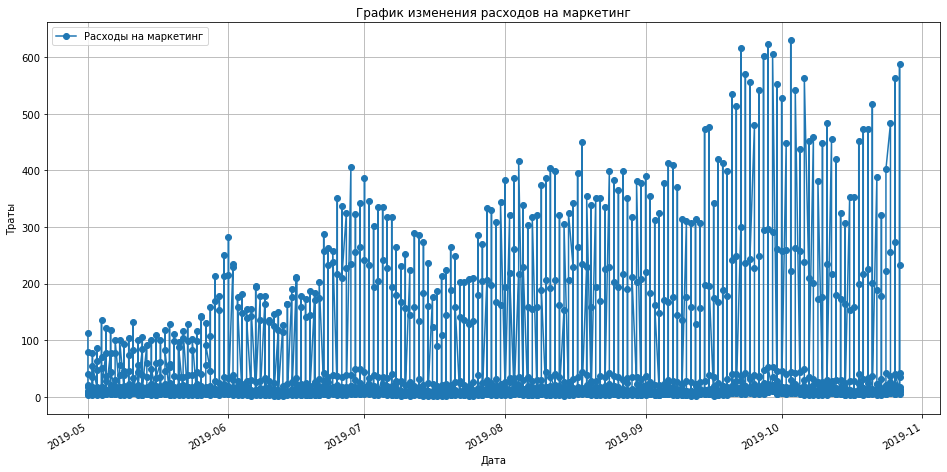

In [57]:
costs.plot(y = 'costs', x = 'dt', figsize = (16, 8), grid = True, label = 'Расходы на маркетинг', linestyle = '-', marker = 'o') 
plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

Из графика можно увидеть увеличение расходов на маркетинг со временем. В конце сентября - в начале октября был пик в 630. Уже дальше происходило небольшое снижение, а далее к концу октября расходы на маркетинг опять приблизились к 600.

**Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику:**

Создадим столбцы с необходимыми данными (день, неделя, месяц):

In [58]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['day'] = costs['dt'].dt.day
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
profiles['day'] = profiles['dt'].dt.day

Построим графики, отражающие динамику изменения расходов по неделям и месяцам:

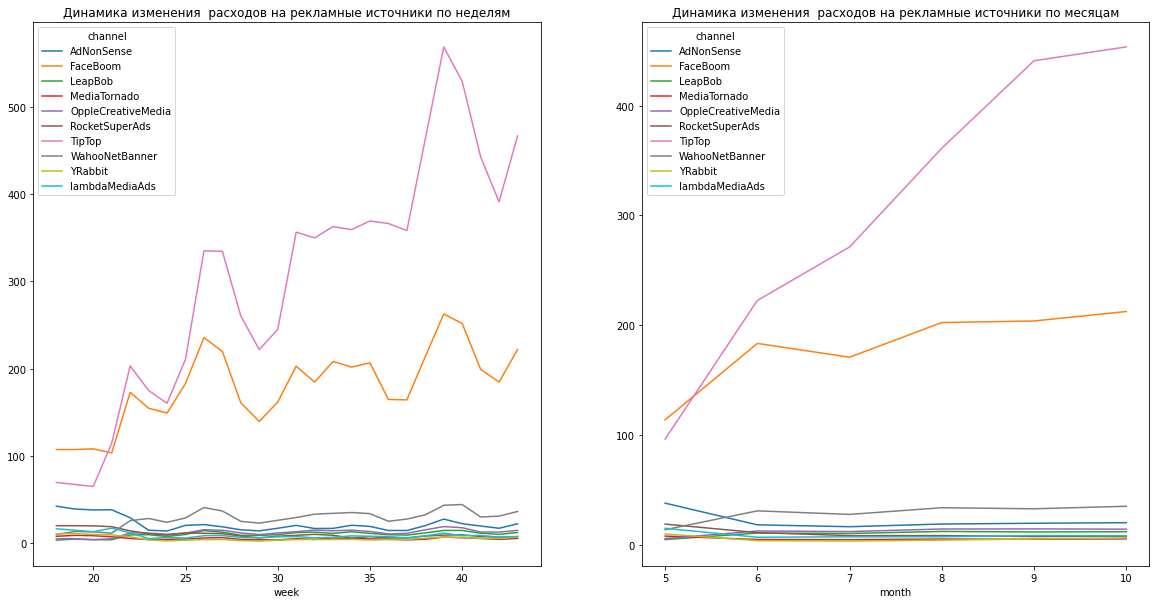

In [59]:
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs').plot(ax = plt.subplot(1, 2, 1), figsize = (20, 10))
plt.title('Динамика изменения  расходов на рекламные источники по неделям')
costs.pivot_table(index = 'month', columns = 'channel', values = 'costs').plot(ax = plt.subplot(1, 2, 2), figsize = (20, 10))
plt.title('Динамика изменения  расходов на рекламные источники по месяцам')
plt.show()

Из графиков можно сделать вывод, что самые большие изменения расходов у двух рекламных источников, это источник TipTop и FaceBoom, на данные источники наибольшее увеличение расходов со временем. На TipTop чуть больше, нежели на FaceBoom. Также немного увелечились рекламные расходы на источник WahooNetBanner, а вот на AdNovSense чуть уменьшались расходы. Траты на остальные рекламные источники практически не изменились.

**Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника:**

Построим таблицу с расчетом среднего CAC для каждого источника:

In [60]:
cac = profiles.groupby(['channel', 'month', 'day']).agg({'acquisition_cost': 'mean'})
cac = cac.rename(columns = {'acquisition_cost': 'CAC'})
cac_mean = cac.groupby('channel').agg({'CAC': 'mean'})
display(cac_mean.sort_values(by = 'CAC', ascending = False))

,CAC
channel,
TipTop,2.655599
FaceBoom,1.112864
AdNonSense,1.010467
lambdaMediaAds,0.721029
WahooNetBanner,0.599336
RocketSuperAds,0.406634
OppleCreativeMedia,0.249327
MediaTornado,0.218692
YRabbit,0.211194


Из таблицы видим у источника organic CAC равно нулю построим, таблицу без него.

Построим таблицу с расчетом среднего CAC для каждого источника, но без источника organic:

In [61]:
cac = profiles.query('channel != "organic"').groupby(['channel', 'month', 'day']).agg({'acquisition_cost': 'mean'})
cac = cac.rename(columns = {'acquisition_cost': 'CAC'})
cac_mean = cac.groupby('channel').agg({'CAC': 'mean'})
display(cac_mean.sort_values(by = 'CAC', ascending = False))

,CAC
channel,
TipTop,2.655599
FaceBoom,1.112864
AdNonSense,1.010467
lambdaMediaAds,0.721029
WahooNetBanner,0.599336
RocketSuperAds,0.406634
OppleCreativeMedia,0.249327
MediaTornado,0.218692
YRabbit,0.211194


Самый дорогой трафик идет с источника TipTop, для него CAC равно 2.7. Далее идет источник FaceBoom для него уже CAC равно 1.1. И замыкает тройку источник AdNonSense(CAC = 1). Далее идут источники с CAC менее 1, самый дешевых трафик у источника LeapBob(0.21).

Рассчитаем среднее CAC для всех источников:

In [62]:
mean_CAC = (sum_costs / (profiles['channel'].count())).round(3)
print(f'Средняя стоимость привлечения одного пользователя (CAC) равна: {mean_CAC}')

Средняя стоимость привлечения одного пользователя (CAC) равна: 0.703


Посчитаем среднее CAC для всех источников без источника organic (так как органика нам ничего не стоила):

In [63]:
costs = costs.query('channel != "organic"')
sum_costs = costs['costs'].sum().round(1)
print(f'Общая сумма расходов на маркетинг составляет: {sum_costs}')
mean_CAC = (sum_costs / (profiles['channel'].count())).round(3)
print(f'Средняя стоимость привлечения одного пользователя (CAC) равна: {mean_CAC}')

Общая сумма расходов на маркетинг составляет: 105497.3
Средняя стоимость привлечения одного пользователя (CAC) равна: 0.703


**Выводы по разделу (4 Маркетинг):**

В ходе выполнения раздела, было определено:

Всего на маркетинг было потрачено 105497.3.

Была простроена таблицу с вычислением трат на каждый рекламный источник. Из нее было определено, что больше всего трат приходится на источник TipTop (51.9%). Следом идет источник FaceBoom траты на него составляют 30.8%. Далее идут уже более низкозатратные источники WahooNetBanner(4.9%), AdNonSense(3.7%) и OppleCreativeMedia(2.0%). На оставшиеся источники приходится от 1 до 2% трат. И меньше всего трат на источники MediaTornado и YRabbit по 0.9%.

Были простроены графики, отражающие динамику изменения расходов по неделям и месяцам. Из них был сделан вывод, что самые большие изменения расходов у двух рекламных источников, это источник TipTop и FaceBoom, на данные источники наибольшее увеличение расходов со временем. На TipTop чуть больше, нежели на FaceBoom. Также немного увеличились рекламные расходы на источник WahooNetBanner, а вот на AdNovSense чуть уменьшались расходы. Траты на остальные рекламные источники практически не изменились.

Было вычислено, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Был сделан вывод, что самый дорогой трафик идет с источника TipTop, для него CAC равно 2.7. Далее идет источник FaceBoom для него уже CAC равно 1.1. И замыкает тройку источник AdNonSense(CAC = 1). Далее идут источники с CAC менее 1, самый дешевых трафик у источника LeapBob(0.21). А средняя стоимость привлечения одного пользователя (CAC) равна 0.703.

В итоге получается, что самый дорогой источник рекламы - это TipTop, а также на него рекламные траты только возрастают.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Анализ окупаемости рекламы:**

Сделаем фильтрацию органических пользователей, ведь мы анализируем расходы на рекламу, а органика нам ничего не стоила:

In [64]:
profiles = profiles.query('channel != "organic"')

Считаем показатели LTV и ROI:

In [65]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

Построим графики LTV и ROI:

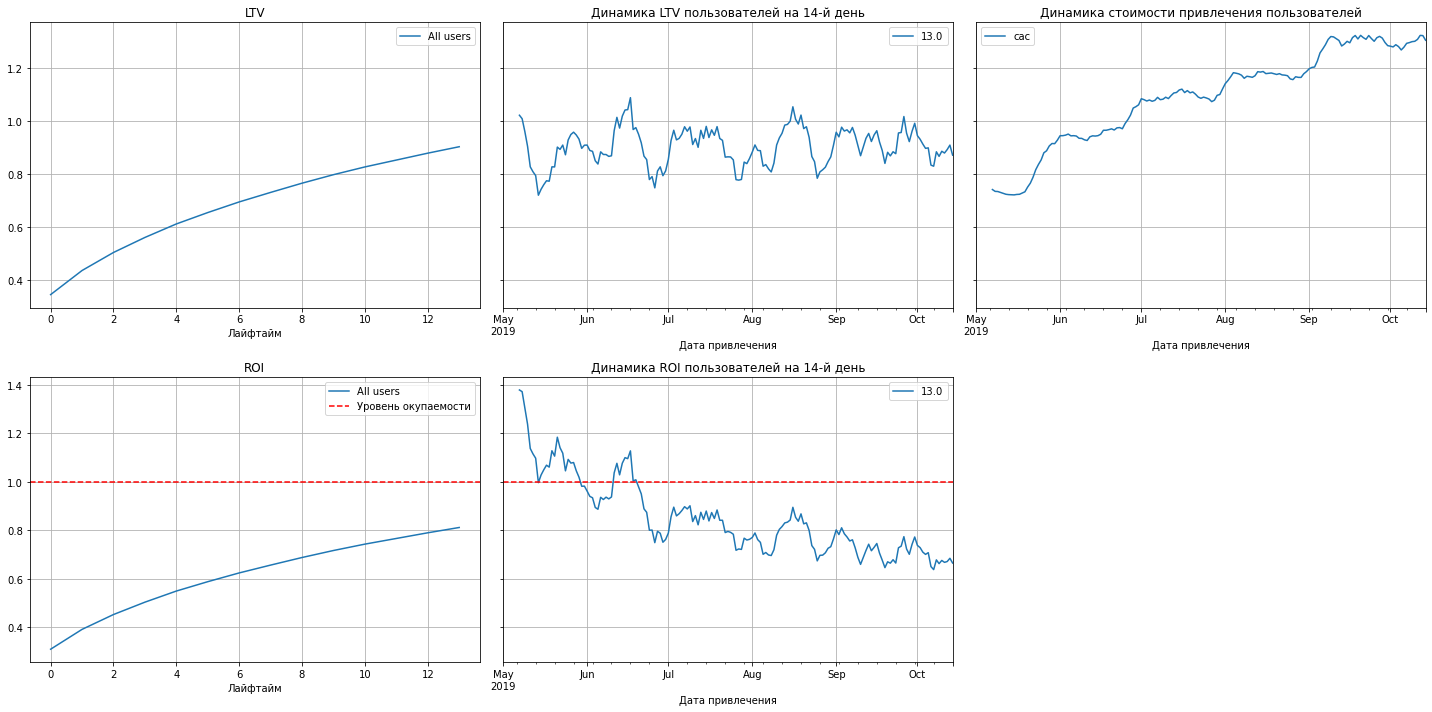

In [66]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из графиков можно сделать следующие выводы:
* CAC сильно меняется, а вот рекламный бюджет увеличивался со временем;
* Реклама не окупается за 12 дней, под конец 12 дня ROI около 0.8;
* LTV зависит от сезона, но все же данный показатель довольно стабилен. Получается качество пользователей приблизительно всегда на одном уровне;
* ROI пользователей падает со временем, до августа данный показатель был выше уровня окупаемости, но после уже стал ниже.

**Анализ окупаемости рекламы с разбивкой по устройствам:**

Построим графики для анализа конверсии по устройствам:

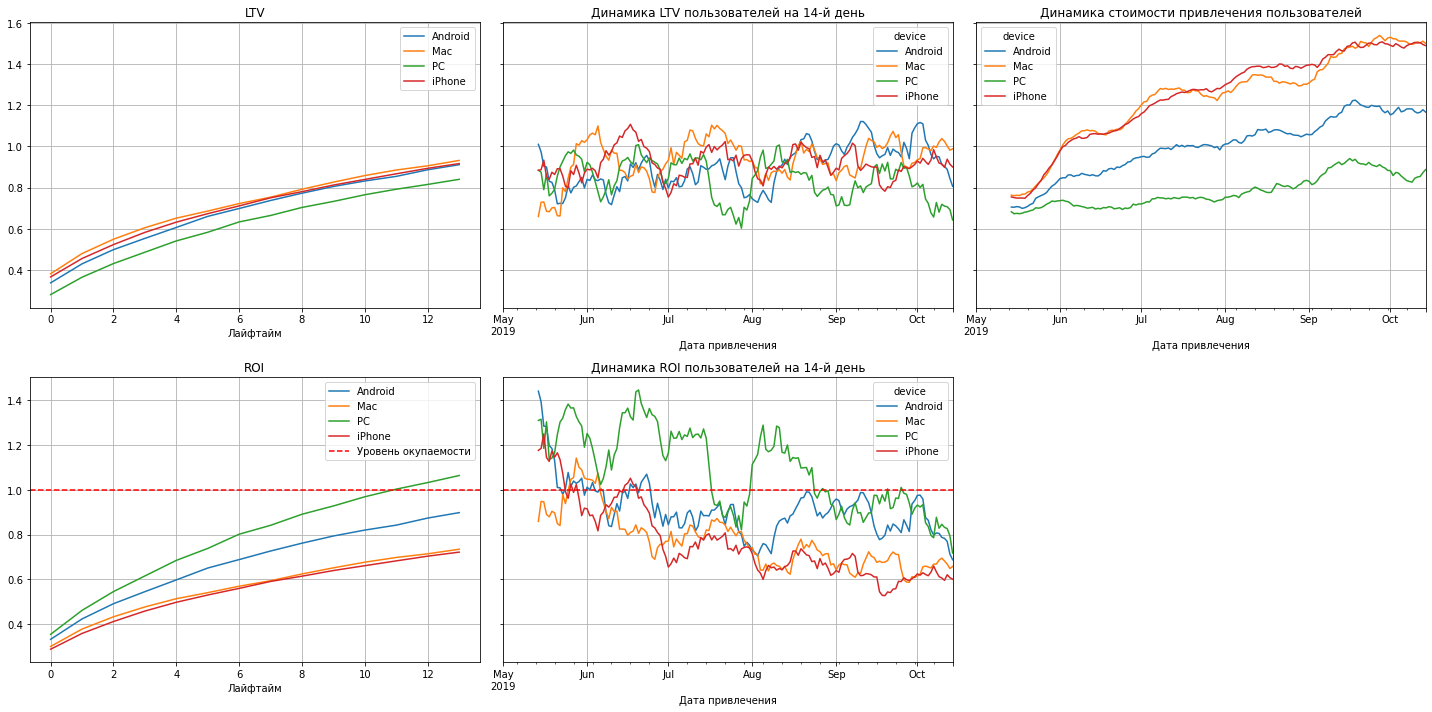

In [67]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

Из графиков можно сделать следующие выводы:
* Пользователи всех устройств окупались почти до июня, но потом перестали окупаться пользователи IPhone, MAC и Android, так как IPhone и MAC это одна платформа, то сделаю предположение, что вышло какой-то обновление для Apple, которое повлияло на окупаемость;
* Стоимость привлечения пользователей PC самая низкая;
* С середины июля ROI пользователей PC был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня окупаемости, начиная с июня;
* LTV пользователей подвержен сезонности, но все же в основном он стабилен;
* Стоимость привлечения пользователей PC самая низкая, а параметр ROI - наоборот, самый высокий;
* В целом, можно увидеть, что стоимость привлечения пользователей всех устройств росла за данный период.

Посчитаем и визуализируем конверсию для пользователей различных устройств:

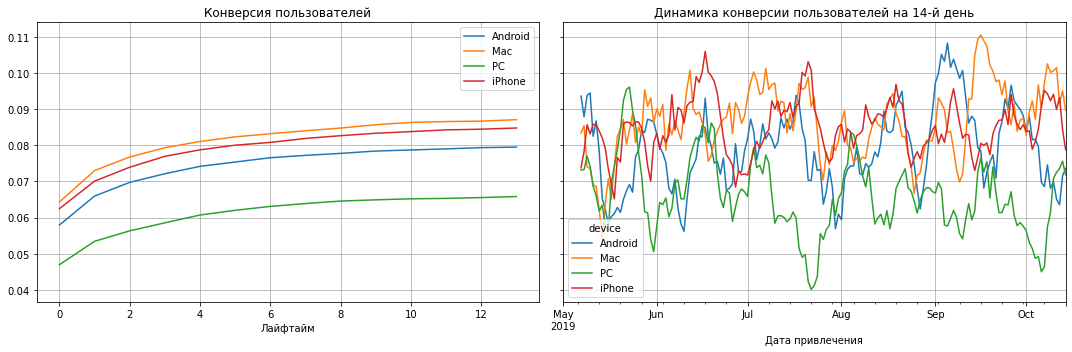

In [68]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Из графиков конверсии пользователей различных устройств можно сделать следующие выводы: пользователи Mac, Android и iPhone конвертируются хорошо, причём постоянно, скорее всего дело в удержании.

Построим графики удержания пользователей различных устройств, и отобразим ее динамику:

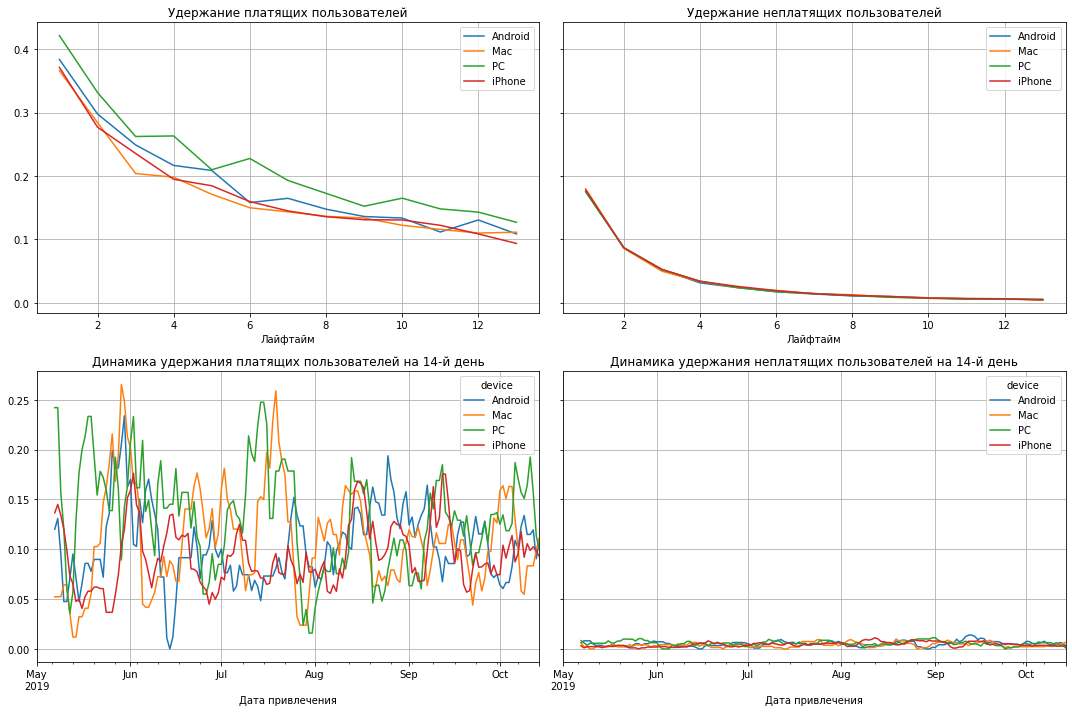

In [69]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions = dimensions)
plot_retention(retention_grouped, retention_history, horizon_days)

Из графиков удержания пользователей различных устройств, можно сделать вывод, что почти все пользователи различных устройств хорошо удерживались. Не платящие пользователи удерживаются стабильно плохо, что ожидаемо. А вот из платящих пользователей лучше всего удерживаются пользователи PC, а вот хуже удерживаются пользователи IPhone и Mac.

**Анализ окупаемости рекламы с разбивкой по странам:**

Построим графики для анализа конверсии по странам:

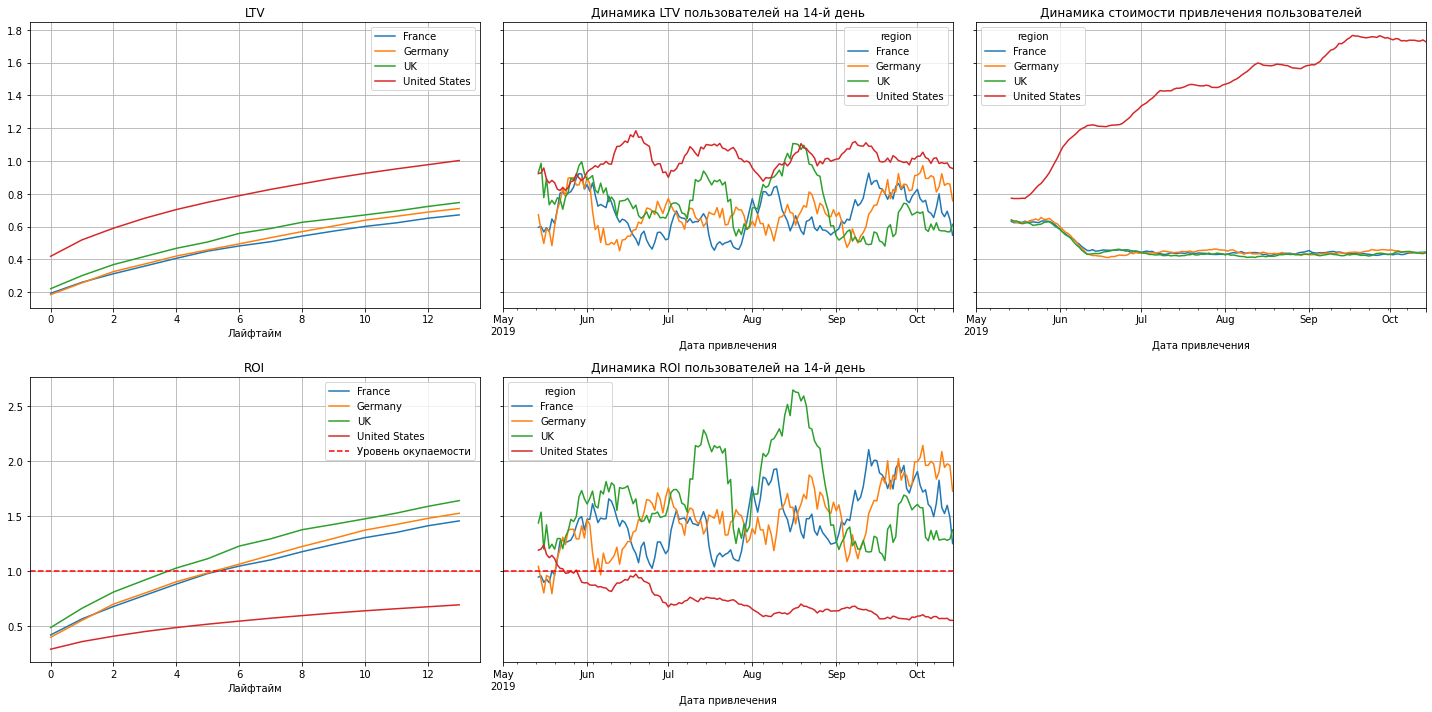

In [70]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

Из графиков можно сделать следующие выводы:
* Реклама не везде окупается. Например, в США уровень окупаемости рекламы не высокий. При этом стоимость привлечения пользователей из США - самая высокая, и она растет;
* Лучше всего реклама окупается во Франции и Англии, а вот в США - нет. Окупаемость начала падать с конца июня. Возможно, это связано с запуском похожего продукта у конкурентов или какие-то изменения в продукте сыграли такую роль, и сервис стал менее привлекательным для пользователей.
* Окупаемость рекламы происходит на 2-4 день у Франции, Германии и Великобритании. А вот у США, даже на 12 день не окупается.

Посчитаем и визуализируем конверсию для пользователей из различных стран:

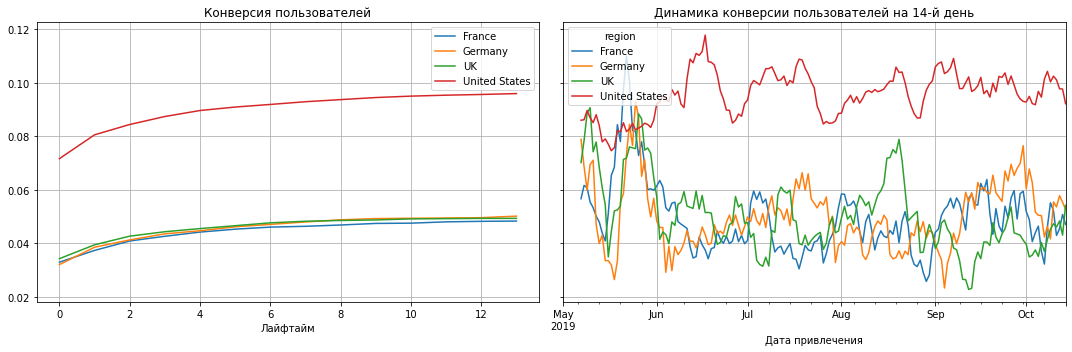

In [71]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Из графиков можно сделать вывод, что довольно слабая конверсия у пользователей из Англии, Германии и Франции. Но в тоже время их доля относительно всех пользователей маленькая.

Построим графики удержания пользователей из различных стран, и отобразим ее динамику:

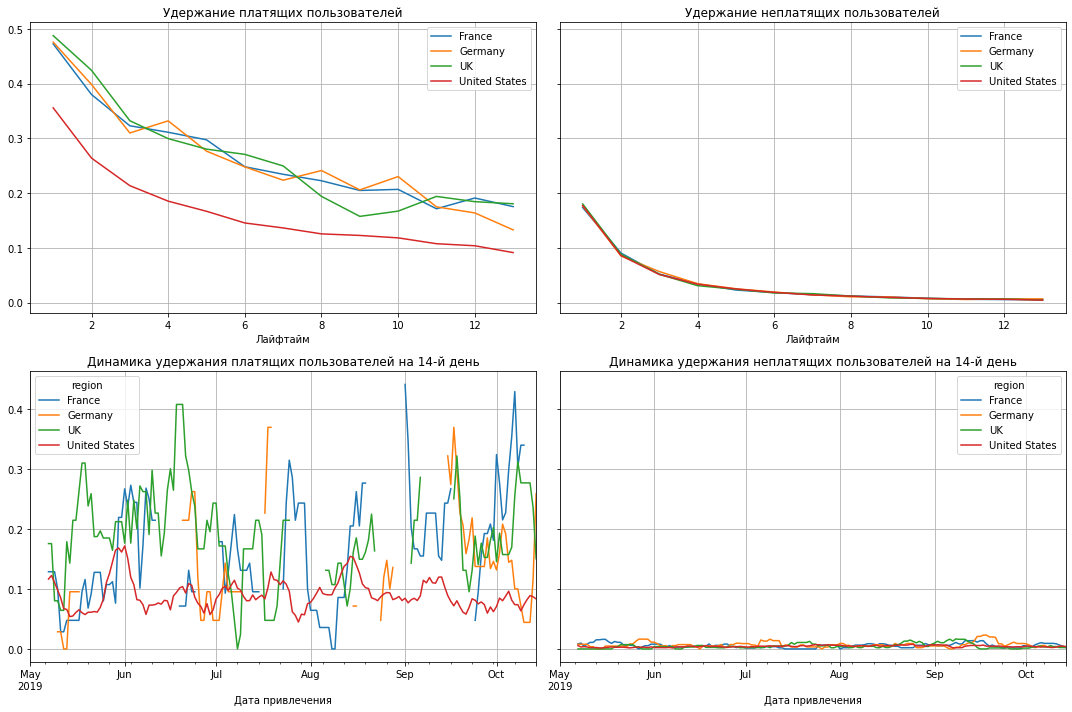

In [72]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions = dimensions)
plot_retention(retention_grouped, retention_history, horizon_days)

Из графиков можно увидеть, что пользователи из США явно плохо удерживаются. 

**Анализ окупаемости рекламы с разбивкой по рекламным каналам:**

Построим графики для анализа конверсии по рекламным каналам:

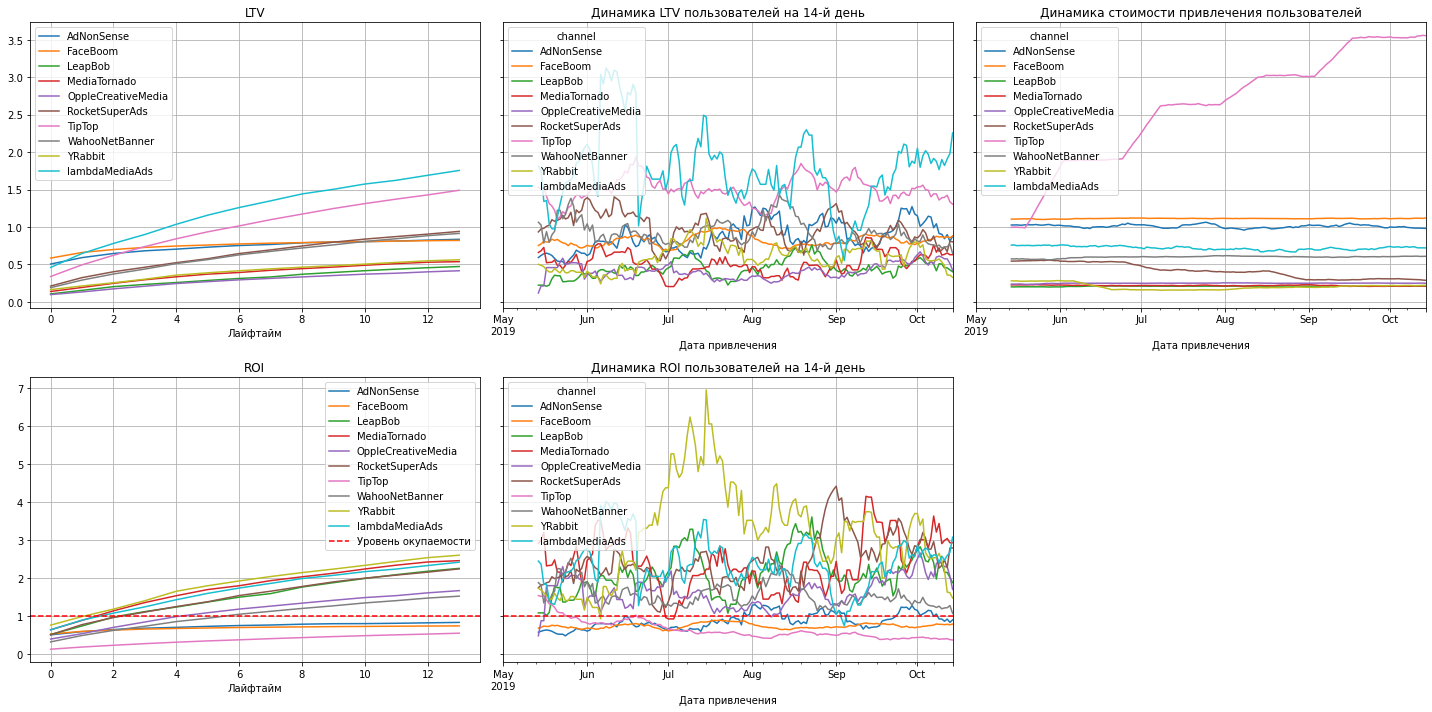

In [73]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

Из графиков можно сделать следующие выводы:
* Что присутствует большой рост стоимости привлечения пользователей из рекламного канала TipTop;
* Достаточно много средств было потрачено на эту рекламную сеть, по сравнению с другими. Но в тоже время реальные результаты не такие высокие;
* Пользователи окупаются, которые были привлечены из каналов LeapBop, FaceBoom и TipTop;
* Хорошо себя показала рекламная сеть YRabbit в июле - ROI пользователей на 14 день был довольно высок.

Посчитаем и визуализируем конверсию для пользователей из разных каналов:

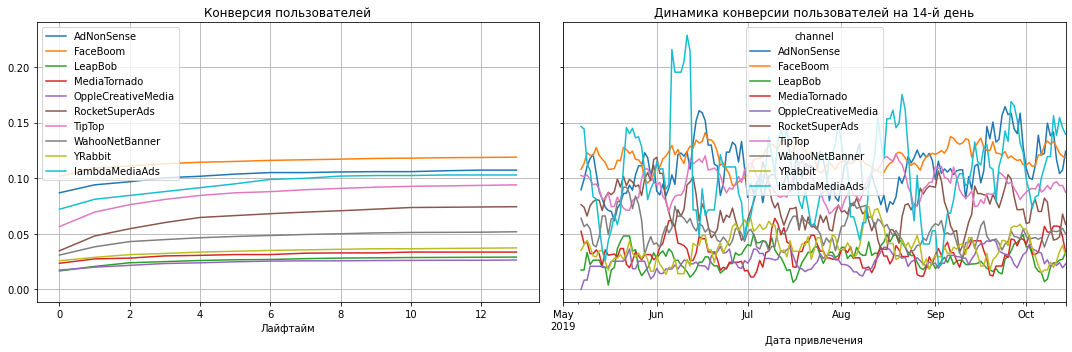

In [74]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Из графиков можно сделать вывод, что довольно плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado и YRabbit.

Построим графики удержания пользователей из различных каналов, и отобразим ее динамику:

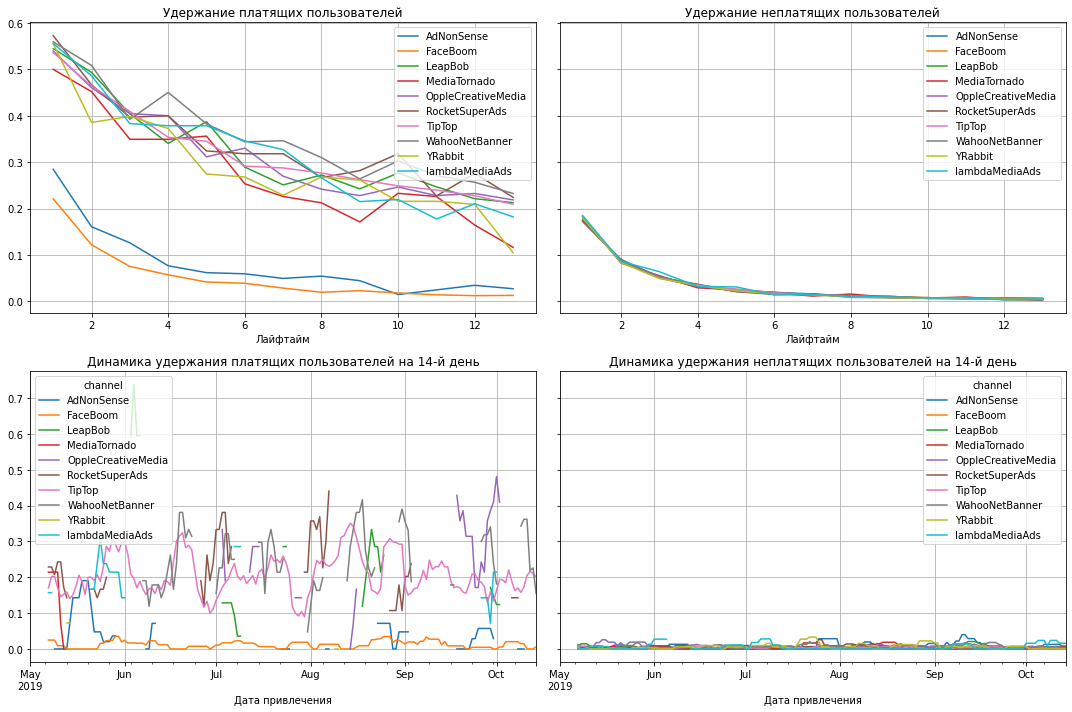

In [75]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions = dimensions)
plot_retention(retention_grouped, retention_history, horizon_days)

Из графиков можно сделать следующие выводы:
* Динамика удержания неплатяших пользователей довольно низкая, но стабильная;
* Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

**Выводы по разделу (5 Оцените окупаемость рекламы):**

В ходе выполнения раздела, было определено:

Был проанализирована окупаемость рекламы. Построены графики LTV и ROI, из которых были сделаны следующие выводы:
* CAC сильно меняется, а вот рекламный бюджет увеличивался со временем;
* Реклама не окупается за 12 дней, под конец 12 дня ROI около 0.95;
* LTV зависит от сезона, но все же данный показатель довольно стабилен. Получается качество пользователей приблизительно всегда на одном уровне;
* ROI пользователей падает со временем, до августа данный показатель был выше уровня окупаемости, но после уже стал ниже.

Был произведен анализ окупаемости рекламы с разбивкой по устройствам. Были построены графики для анализа конверсии по устройствам. Из которых были сделаны следующие выводы:
* Пользователи всех устройств окупались почти до конца июня, но потом перестали окупаться пользователи IPhone и MAC, так как это одна платформа, то сделаю предположение, что вышло какой-то обновление для Apple, которое повлияло на окупаемость. Также моментами не окупались пользователи Android, но это происходило реже;
* Стоимость привлечения пользователей PC самая низкая;
* С середины августа ROI пользователей PC был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня окупаемости, начиная с августа;
* LTV пользователей подвержен сезонности, но все же в основном он стабилен;
* Стоимость привлечения пользователей PC самая низкая, а параметр ROI - наоборот, самый высокий;
* В целом, можно увидеть, что стоимость привлечения пользователей всех устройств росла за данный период.

Была посчитана и визуализирована конверсия для пользователей различных устройств. Из графиков конверсии пользователей различных устройств можно сделать следующие выводы: пользователи Mac, Android и iPhone конвертируются хорошо, причём постоянно, скорее всего дело в удержании.

Были построены графики удержания пользователей различных устройств, и отображена ее динамика. Из графиков удержания пользователей различных устройств, можно сделать вывод, что почти все пользователи различных устройств хорошо удерживались. Не платящие пользователи удерживаются стабильно плохо, что ожидаемо. А вот из платящих пользователей лучше всего удерживаются пользователи PC, а вот хуже удерживаются пользователи IPhone и Mac.

Был произведен анализ окупаемости рекламы с разбивкой по странам. Были построены графики для анализа конверсии по странам. Из которых были сделаны следующие выводы:
* Реклама не везде окупается. Например, в США уровень окупаемости рекламы не высокий. При этом стоимость привлечения пользователей из США - самая высокая, и она растет;
* Лучше всего реклама окупается во Франции и Англии, а вот в США - нет. Окупаемость начала падать с конца июня. Возможно, это связано с запуском похожего продукта у конкурентов или какие-то изменения в продукте сыграли такую роль, и сервис стал менее привлекательным для пользователей.
* Окупаемость рекламы происходит на 2-4 день у Франции, Германии и Великобритании. А вот у США, даже на 12 день не окупается.

Была посчитана и визуализирована конверсия для пользователей различных стран. Из графиков можно сделать вывод, что довольно слабая конверсия у пользователей из Англии, Германии и Франции. Но в тоже время их доля относительно всех пользователей маленькая.

Были построены графики удержания пользователей из различных стран,  и отображена ее динамика. Из графиков можно увидеть, что пользователи из США явно плохо удерживаются.

Был произведен анализ окупаемости рекламы с разбивкой по рекламным каналам. Были построены графики для анализа конверсии по рекламным каналам. Из которых были сделаны следующие выводы:
* Что присутствует большой рост стоимости привлечения пользователей из рекламного канала TipTop;
* Достаточно много средств было потрачено на эту рекламную сеть, по сравнению с другими. Но в тоже время реальные результаты не такие высокие;
* Пользователи окупаются, которые были привлечены из каналов LeapBop, FaceBoom и TipTop;
* Хорошо себя показала рекламная сеть YRabbit в июле - ROI пользователей на 14 день был довольно высок.

Была посчитана и визуализирована конверсия для привлеченных пользователей из разных каналов. Из графиков был сделан вывод, что довольно плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado и YRabbit.

Были построены графики удержания для привлеченных пользователей из разных каналов. Из графиков были сделаны следующие выводы:
* Динамика удержания неплатяших пользователей довольно низкая, но стабильная;
* Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

Также сделаны выводы, что в целом, реклама близка к окупемости, если учитывать, что в анализ включены органические пользователи. Реклама почти всегда окупается к концу 2й недели. ROI — примерно равно 80%. Окупаемость низкая у владельцев Mac и iPhone, страна - США. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Проблемы окупаемости могут быть вызваны неравномерным распределением средств на рекламу (в какой-либо источник было вложено больше средств, по сравнению с другими, например, TipTop, а он не оправдал надежд), либо возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились, и они окупятся на более длинной дистанции.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Выделение причин неэффективности привлечения пользователей:**

Оценена окупаемость рекламы. Были рассчитаны и визуализированы LTV и ROI. По графикам сделаны следующие выводы:

Рекламное объявление никак не окупается к окончанию 2й недели. ROI — приблизительно 80%, CAC непостоянен. Маркетинговый бюджет возрастает вместе с ходом периода. На LTV влияет сезонный фактор, однако в целом, данный коэффициент довольно стабилен. Означает, что проблема никак не в смещении в худшую сторону свойства пользователей. ROI пользователей снижается со временем, вплоть до июля коэффициент был больше степени окупаемости, однако уже после начал снижаться до 0.6.

Пользователи абсолютно всех устройств окупались вплоть до июня, а затем что-то пошло не так, в особенности у пользователей Mac а также Iphone. К сентябрю (а также какое-то период в августе) ROI пользователей PC на 14 был на границе окупаемости, ROI абсолютно всех других устройств был уже ниже уровня начиная с июня.

LTV пользователей всё так же подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а вот ROI - наоборот, выше остальных. В целом, заметно, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

Обратить внимание следует на владельцев Mac и iPhone - стоимость их привлечения очень высока и растет, а окупаемоcть не высокая. Пользователи Mac, Android и iPhone конвертируются неплохо. Ввидно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

В США уровень окупаемости рекламы низкий, при этом стоимость привлечения пользователей из Америки - самая высокая. Окупаемость пользователей начала падать с конца июня 2019 года. Слабая конверсия у пользователей из Англии, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.

Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Проблемы окупаемости могут быть вызваны неравномерным распределением средств на рекламу (в какой-либо источник было вложено больше средств, по сравнению с другими, например, TipTop, а он не оправдал надежд), либо возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились, и они окупятся на более длинной дистанции.

**Рекомендации для отдела маркетинга:**

Я бы посоветовал немного сократить привлечение владельцев Mac и iPhone и Android - стоимость их привлечения высока и растет, а окупаемость низкая. Стоит рассмотреть маркетинговое предложение именно для владельцев лидирующих по оплате устройств, чтобы они приносили продукту большую денежную прибыль.

Платящие пользователи устройства предпочитают IPhone и Android. Клиенты больше пользуются мобильными устройствами, чем ПК.. Стоит на данный сегмент выделять больше средств. 

Также посоветовал бы уменьшить выделяемые средства на канал TipTop, или пересмотреть свой рекламный подход и перенаправить средства на более эффективный канал. Так как достаточно много средств было потрачено на эту рекламную сеть, но это не оправдано.